In [1]:
import pandas as pd
import numpy as np
import re
import pycaret
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from numpy.random import default_rng

In [2]:
data = pd.read_csv(r'C:/Users/harry/Downloads/helthcare/NYSDOH_HospitalInpatientDischarges_SPARCS_De-Identified_2017.csv')

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343569 entries, 0 to 2343568
Data columns (total 34 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Hospital Service Area                object 
 1   Hospital County                      object 
 2   Operating Certificate Number         float64
 3   Permanent Facility Id                float64
 4   Facility Name                        object 
 5   Age Group                            object 
 6   Zip Code - 3 digits                  object 
 7   Gender                               object 
 8   Race                                 object 
 9   Ethnicity                            object 
 10  Length of Stay                       object 
 11  Type of Admission                    object 
 12  Patient Disposition                  object 
 13  Discharge Year                       int64  
 14  CCS Diagnosis Code                   int64  
 15  CCS Diagnosis Description       

In [69]:
data.head(5)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,"114,168.00","40,464.04"
1,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,"58,517.00","26,046.50"
2,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,...,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,"39,647.04","17,397.59"
3,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,"36,031.09","16,118.84"
4,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,...,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,"30,534.00","11,921.05"


In [71]:
print ("Rows     : " ,data.shape[1])
print ("Columns  : " ,data.shape[0])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nUnique values :  \n",data.nunique())

Rows     :  34
Columns  :  2343569

Features : 
 ['Hospital Service Area', 'Hospital County', 'Operating Certificate Number', 'Permanent Facility Id', 'Facility Name', 'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Type of Admission', 'Patient Disposition', 'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description', 'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code', 'APR Severity of Illness Description', 'APR Risk of Mortality', 'APR Medical Surgical Description', 'Payment Typology 1', 'Payment Typology 2', 'Payment Typology 3', 'Birth Weight', 'Abortion Edit Indicator', 'Emergency Department Indicator', 'Total Charges', 'Total Costs']

Unique values :  
 Hospital Service Area                        8
Hospital County                             57
Operating Certificate Number               174
Permanent Facility Id                

In [72]:
data.isnull().sum()

Hospital Service Area                     5155
Hospital County                           5155
Operating Certificate Number              5155
Permanent Facility Id                     5155
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      39019
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [3]:
data = data.replace(" ", np.NaN)

In [4]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Hospital Service Area
False    2338414
True        5155
Name: Hospital Service Area, dtype: int64

Hospital County
False    2338414
True        5155
Name: Hospital County, dtype: int64

Operating Certificate Number
False    2338414
True        5155
Name: Operating Certificate Number, dtype: int64

Permanent Facility Id
False    2338414
True        5155
Name: Permanent Facility Id, dtype: int64

Facility Name
False    2343569
Name: Facility Name, dtype: int64

Age Group
False    2343569
Name: Age Group, dtype: int64

Zip Code - 3 digits
False    2304550
True       39019
Name: Zip Code - 3 digits, dtype: int64

Gender
False    2343569
Name: Gender, dtype: int64

Race
False    2343569
Name: Race, dtype: int64

Ethnicity
False    2343569
Name: Ethnicity, dtype: int64

Length of Stay
False    2343569
Name: Length of Stay, dtype: int64

Type of Admission
False    2343569
Name: Type of Admission, dtype: int64

Patient Disposition
False    2343569
Name: Patient Disposition, dtype: int64

Disch

In [5]:
#changing all the data types to relevant ones
data = data.convert_dtypes()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343569 entries, 0 to 2343568
Data columns (total 34 columns):
 #   Column                               Dtype 
---  ------                               ----- 
 0   Hospital Service Area                string
 1   Hospital County                      string
 2   Operating Certificate Number         Int64 
 3   Permanent Facility Id                Int64 
 4   Facility Name                        string
 5   Age Group                            string
 6   Zip Code - 3 digits                  string
 7   Gender                               string
 8   Race                                 string
 9   Ethnicity                            string
 10  Length of Stay                       string
 11  Type of Admission                    string
 12  Patient Disposition                  string
 13  Discharge Year                       Int64 
 14  CCS Diagnosis Code                   Int64 
 15  CCS Diagnosis Description            string
 16  

In [6]:
data['Length of Stay'] = data['Length of Stay'].str.replace(r'+', '', regex=True)

In [7]:
X = data['Length of Stay']
Y = data['Total Charges']
print(X,Y) #checking if type conversion was sucessful

0          21
1           8
2           6
3           4
4           4
           ..
2343564     2
2343565     2
2343566     3
2343567     2
2343568     1
Name: Length of Stay, Length: 2343569, dtype: string 0          114,168.00
1           58,517.00
2           39,647.04
3           36,031.09
4           30,534.00
              ...    
2343564     87,545.08
2343565     31,896.05
2343566     49,292.49
2343567     66,399.81
2343568      2,933.75
Name: Total Charges, Length: 2343569, dtype: string


In [79]:
data.shape

(2343569, 34)

In [16]:
#using some sample data 
data_seen = data.sample(frac=0.95, random_state=786)
data_unseen = data.drop(data_seen.index)
data_seen.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

#print the shape of the new data we are using -
print('Data for Modeling: ' + str(data_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (2226391, 34)
Unseen Data For Predictions: (117178, 34)


In [8]:
data1 = data

In [ ]:
#applying some machine learning

In [16]:
Y = data1["Total Charges"]#response var
data1 = data1.drop(columns=['Total Charges'])


In [17]:
X = data1["Length of Stay"]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.95, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc_Y = StandardScaler()
print(Y)
data['Total Charges'] = data['Total Charges'].astype(float)

0          114,168.00
1           58,517.00
2           39,647.04
3           36,031.09
4           30,534.00
              ...    
2343564     87,545.08
2343565     31,896.05
2343566     49,292.49
2343567     66,399.81
2343568      2,933.75
Name: Total Charges, Length: 2343569, dtype: string


ValueError: could not convert string to float: '114,168.00'

In [ ]:
y = np.array(Y)
y_train = np.array(Y_train)
y_train = np.array(Y_train)
y_test = np.array(Y_test)
y_train= y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
y_train2 = pd.DataFrame(sc_Y.fit_transform(y_train))
y_test2 = pd.DataFrame(sc_Y.transform(y_test))

In [ ]:
#y_train2.columns = y_train.columns.values
#y_test2.columns = y_train.columns.values
#y_train2.index = y_train.index.values
#y_test2.index = y_train.index.values

In [8]:
print(data.corr())

                              Operating Certificate Number  \
Operating Certificate Number                      1.000000   
Permanent Facility Id                             0.664918   
Discharge Year                                         NaN   
CCS Diagnosis Code                                0.037160   
CCS Procedure Code                                0.168610   
APR DRG Code                                      0.042204   
APR MDC Code                                      0.044093   
APR Severity of Illness Code                     -0.032443   

                              Permanent Facility Id  Discharge Year  \
Operating Certificate Number               0.664918             NaN   
Permanent Facility Id                      1.000000             NaN   
Discharge Year                                  NaN             NaN   
CCS Diagnosis Code                         0.026997             NaN   
CCS Procedure Code                         0.137821             NaN   
APR DRG Code   

In [9]:
test = data[['Length of Stay', 'Total Charges']]
X = test[['Total Charges']]
y = test['Length of Stay']
test['Length of Stay'] = test['Length of Stay'].astype('int')
test['Total Charges'] = test['Total Charges'].str.replace(',','')
test.sample(5)

C:\Users\harry\AppData\Local\Temp/ipykernel_3944/1290928415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Length of Stay'] = test['Length of Stay'].astype('int')
C:\Users\harry\AppData\Local\Temp/ipykernel_3944/1290928415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Total Charges'] = test['Total Charges'].str.replace(',','')


,Length of Stay,Total Charges
883842,8,39637.05
192806,7,40902.49
1981992,1,21868.00
1709099,14,13264.34
1097192,3,40867.40


In [10]:
# Instantiating a LinearRegression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [11]:
print('The type of x is ', type(X))
print('The type of y is ', type(y))

The type of x is  <class 'pandas.core.frame.DataFrame'>
The type of y is  <class 'pandas.core.series.Series'>


In [12]:
X = test[['Length of Stay']]
y = test['Total Charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.90 ,random_state = 42)
model.fit(X_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)

print('The r2 is: ', r2)



The r2 is:  0.46676578924665735


In [ ]:
#we can see that value of r2 is not high as predicted , so we will try to filter the data a bit to see if it improves anything.

In [14]:
x = test['Length of Stay']
print(x)

0          21
1           8
2           6
3           4
4           4
           ..
2343564     2
2343565     2
2343566     3
2343567     2
2343568     1
Name: Length of Stay, Length: 2343569, dtype: int32


In [15]:
test1 = test[(test['Length of Stay'] >= 3) & (test['Length of Stay'] <= 100)]
test1.sample(5)

,Length of Stay,Total Charges
1480581,6,47081.16
1335565,4,23563.50
2180877,3,29122.37
629806,4,98292.86
284024,3,24623.81


In [16]:
X = test1[['Length of Stay']]
y = test1['Total Charges']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.90 , random_state = 42)
model.fit(X_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)

print('The r2 is: ', r2)

The r2 is:  0.42167852420175955


In [18]:
t2 = data[['Total Charges', 'Gender']]
t2.sample(5)

,Total Charges,Gender
1258514,"46,786.44",F
1547639,"63,469.92",M
1700982,"4,941.20",F
1422075,"6,744.32",F
2070408,"11,032.55",M


In [19]:
#replacing the gender column with numbers to make it easier
t2['Gender'] = t2['Gender'].replace(to_replace='M', value= '1')
t2['Gender'] = t2['Gender'].replace(to_replace='F', value= '2')
t2['Gender'] = t2['Gender'].replace(to_replace='U', value= '0')
t2.sample(5)

C:\Users\harry\AppData\Local\Temp/ipykernel_3944/2087064764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['Gender'] = t2['Gender'].replace(to_replace='M', value= '1')
C:\Users\harry\AppData\Local\Temp/ipykernel_3944/2087064764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['Gender'] = t2['Gender'].replace(to_replace='F', value= '2')
C:\Users\harry\AppData\Local\Temp/ipykernel_3944/2087064764.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Total Charges,Gender
2113211,"401,644.53",2
1007577,"9,679.86",2
977909,"26,579.68",1
1049020,"18,971.63",2
123180,"19,806.95",2


In [34]:
t2['Total Charges'] = t2['Total Charges'].str.replace(',','')
t2['Gender'] = t2['Gender'].astype(float)
X = t2[['Gender']]
y = t2['Total Charges']


C:\Users\harry\AppData\Local\Temp/ipykernel_21928/2617193178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2['Total Charges'] = t2['Total Charges'].str.replace(',','')


ValueError: could not convert string to float: 'M'

In [20]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70,random_state= 42)

In [21]:
a = data[(data['Hospital County'] == 'Manhattan')]

In [22]:
r = a[['Total Charges', 'Gender']]
r.sample(5)

,Total Charges,Gender
1991491,"42,583.83",M
2090766,"45,542.55",M
1879052,"39,213.96",F
1256222,"11,609.72",F
1152429,"30,704.10",M


In [23]:
r['Total Charges'] = r['Total Charges'].str.replace(',','')
r['Gender'] = r['Gender'].replace(to_replace='M', value= '1')
r['Gender'] = r['Gender'].replace(to_replace='F', value= '2')
r['Gender'] = r['Gender'].astype(int)
X = r[['Gender']]
y = r['Total Charges']


C:\Users\harry\AppData\Local\Temp/ipykernel_3824/4154167791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['Total Charges'] = r['Total Charges'].str.replace(',','')
C:\Users\harry\AppData\Local\Temp/ipykernel_3824/4154167791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['Gender'] = r['Gender'].replace(to_replace='M', value= '1')
C:\Users\harry\AppData\Local\Temp/ipykernel_3824/4154167791.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [24]:
arr_indices_top_drop = default_rng().choice(r.index, size=357717, replace=False)
r.drop(index=arr_indices_top_drop)

,Total Charges,Gender
30,218906.13,2
183,48062.03,2
187,107716.89,1
193,68457.19,1
194,73326.19,2
...,...,...
2341584,115424.00,1
2341596,201168.00,2
2341602,27467.00,1
2342935,307488.80,2


In [23]:
r.to_csv('manhattan.csv')

In [24]:
man = pd.read_csv(r'manhattan.csv')
man.sample(5)

,Unnamed: 0,Total Charges,Gender
67051,309124,"67,899.00",M
230050,1361699,"28,513.88",F
243167,1431260,"71,515.89",M
238765,1412115,"64,346.61",F
338758,2202904,"48,290.21",F


In [25]:
man.drop('Unnamed: 0',axis=1)
arr_indices_top_drop = default_rng().choice(man.index, size=357717, replace=False)
man.drop(index=arr_indices_top_drop)


,Unnamed: 0,Total Charges,Gender
5,171,"372,474.17",M
10,176,"240,402.75",F
14,180,"189,377.40",M
15,181,"99,801.68",M
18,184,"75,865.10",M
...,...,...,...
395677,2341608,"63,812.00",M
395681,2341612,"71,006.00",M
395697,2342955,"60,659.24",M
395714,2343546,"19,282.00",F


In [26]:
manhattan = a[['Total Charges', 'Gender' , 'Length of Stay']]
manhattan['Total Charges'] = manhattan['Total Charges'].str.replace(',','')
manhattan['Gender'] = manhattan['Gender'].replace(to_replace='M', value= '1')
manhattan['Gender'] = manhattan['Gender'].replace(to_replace='F', value= '2')
manhattan['Gender'] = manhattan['Gender'].replace(to_replace='U', value= '0')
manhattan['Gender'] = manhattan['Gender'].astype(int)
manhattan.sample(5)

C:\Users\harry\AppData\Local\Temp/ipykernel_3944/3642722661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan['Total Charges'] = manhattan['Total Charges'].str.replace(',','')
C:\Users\harry\AppData\Local\Temp/ipykernel_3944/3642722661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan['Gender'] = manhattan['Gender'].replace(to_replace='M', value= '1')
C:\Users\harry\AppData\Local\Temp/ipykernel_3944/3642722661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,Total Charges,Gender,Length of Stay
197743,58783.56,2,2
274229,13928.97,2,1
1246258,12292.74,1,8
737745,27469.17,2,6
1614670,19923.70,2,13


In [27]:
from sklearn.neighbors import KNeighborsClassifier
X = manhattan[['Length of Stay']]
y = manhattan['Gender']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70,random_state= 42)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train , y_train)

KNeighborsClassifier()

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.48      0.67      0.56    127478
           2       0.57      0.38      0.46    149524

    accuracy                           0.51    277002
   macro avg       0.53      0.52      0.51    277002
weighted avg       0.53      0.51      0.50    277002

[[85771 41707]
 [93193 56331]]


<AxesSubplot:>

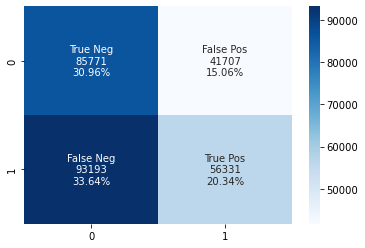

In [33]:
import seaborn as sns
cf_matrix = metrics.confusion_matrix(y_test , y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [34]:
X = manhattan[['Total Charges']]
y = manhattan['Gender']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70,random_state= 42)

In [35]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
classifier = KNeighborsClassifier(n_neighbors = 31)
classifier.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=31)

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.51      0.39      0.44    127478
           2       0.57      0.68      0.62    149524

    accuracy                           0.54    277002
   macro avg       0.54      0.53      0.53    277002
weighted avg       0.54      0.54      0.54    277002

[[ 49485  77993]
 [ 48067 101457]]


<AxesSubplot:>

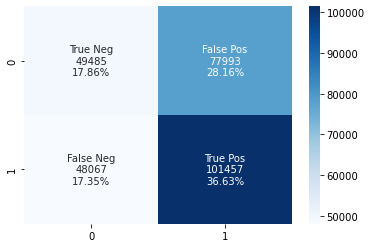

In [39]:
cf_matrix = metrics.confusion_matrix(y_test , y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [40]:
manhattan['Total Charges'] = manhattan['Total Charges'].astype(float)
manhattan['Length of Stay'] = manhattan['Length of Stay'].astype(float)
manhattan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395717 entries, 30 to 2343563
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Total Charges   395717 non-null  float64
 1   Gender          395717 non-null  int32  
 2   Length of Stay  395717 non-null  float64
dtypes: float64(2), int32(1)
memory usage: 10.6 MB


C:\Users\harry\AppData\Local\Temp/ipykernel_3944/338999823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan['Total Charges'] = manhattan['Total Charges'].astype(float)
C:\Users\harry\AppData\Local\Temp/ipykernel_3944/338999823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  manhattan['Length of Stay'] = manhattan['Length of Stay'].astype(float)


In [45]:
from pycaret.classification import *
cat_feat = ['Gender']

,Description,Value
0,session_id,839
1,Target,Total Charges
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(395717, 3)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'